<a href="https://colab.research.google.com/github/krithigau/TSA_EXP7/blob/main/TSA_Ex_7_Auto_regressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from statsmodels.tsa.stattools import adfuller
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 from statsmodels.tsa.ar_model import AutoReg
 from sklearn.metrics import mean_squared_error

In [3]:
 data = pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'],index_col='Month')

In [5]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


In [4]:
x=int(0.8 * len(data))
train_data = data.iloc[:x]
test_data = data.iloc[x:]

In [5]:
lag_order = 13
model = AutoReg(train_data['#Passengers'], lags=lag_order)
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Figure size 1000x600 with 0 Axes>

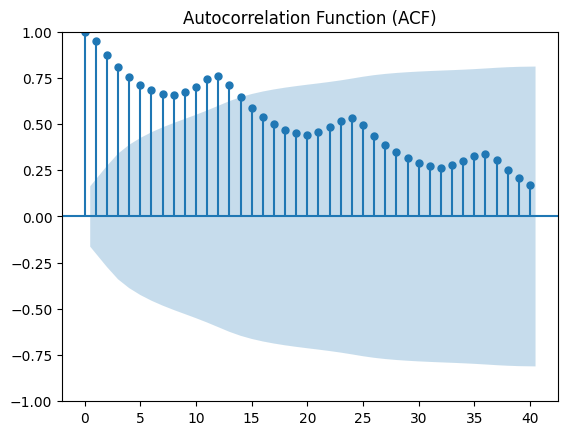

<Figure size 1000x600 with 0 Axes>

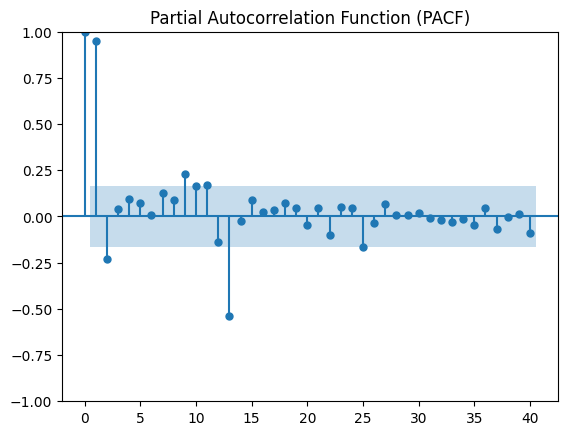

In [6]:
plt.figure(figsize=(10, 6))
plot_acf(data['#Passengers'], lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()
plt.figure(figsize=(10, 6))
plot_pacf(data['#Passengers'], lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [10]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [11]:
 mse = mean_squared_error(test_data['#Passengers'], predictions)
 print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 655.084277257271


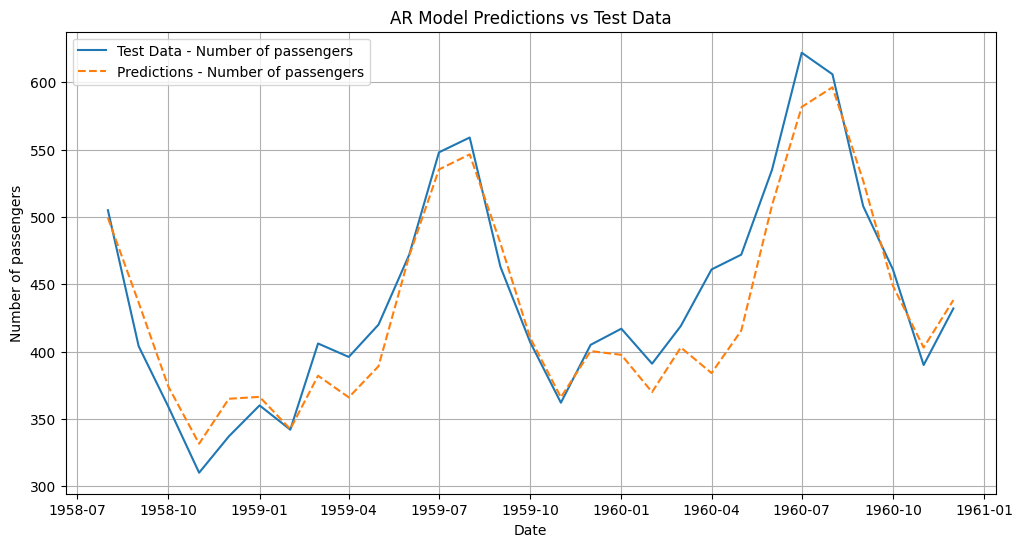

In [12]:
 plt.figure(figsize=(12, 6))
 plt.plot(test_data['#Passengers'], label='Test Data - Number of passengers')
 plt.plot(predictions, label='Predictions - Number of passengers',linestyle='--')
 plt.xlabel('Date')
 plt.ylabel('Number of passengers')
 plt.title('AR Model Predictions vs Test Data')
 plt.legend()
 plt.grid()
 plt.show()